# Table of Contents 
## 1 Import Libraires
## 2 Standarizing the Data
## 3 The elbow technique 
## 4 k-means clustering

# 1. Import Libraries

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.
from sklearn.preprocessing import StandardScaler

In [58]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [59]:
# Create a path
path = r'/Users/alejandrosalgado/Desktop/Final Project'

In [60]:
# Load data
df = pd.read_pickle(r'/Users/alejandrosalgado/Desktop/Final Project/Boat_Orders_clean_2.pkl')

In [61]:
df.head()

,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,Country,City,USD_price,Pricing Category
0,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,Germany,BÃ¶nningstedt,3699.40,Low-priced
1,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,Germany,Bayern,3602.94,Low-priced
2,Fishing Boat,Terhi power boats,"Used boat,Electric",1987,4.35,1.75,GRP,239,Switzerland,Seengen,3780.00,Low-priced
3,Sport Boat,GS Nautica power boats,Used boat,2004,4.70,2.00,GRP,69,Italy,Lake Garda,3710.00,Low-priced
4,Runabout,Kimple power boats,new boat from stock,2020,4.40,1.65,Aluminium,113,Switzerland,Zugersee,4968.00,Low-priced


In [34]:
# Rename the columns
df.rename(columns = {'Number of views last 7 days':'7days_views'}, inplace = True)

/var/folders/wk/r4fv1r8s1kz3ksnb_nsqv6bc0000gn/T/ipykernel_17571/3202746034.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'Number of views last 7 days':'7days_views'}, inplace = True)


In [63]:
df.to_csv(os.path.join(path, 'boat_cleaned_3.csv'))

In [35]:
df.head()

,Length,Width,7days_views,USD_price
0,4.00,1.50,75,3699.40
1,3.55,1.46,58,3602.94
2,4.35,1.75,239,3780.00
3,4.70,2.00,69,3710.00
4,4.40,1.65,113,4968.00


In [36]:
df.shape

(6001, 4)

In [37]:
df = df[['Length','Width','7days_views','USD_price']]

## 2. Standadizing the Data

In [38]:
# standazing the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(df)
print(standardized_data)

[[-1.41005333 -1.76743232 -0.52645641 -0.36476608]
 [-1.50289423 -1.8047781  -0.62569917 -0.3649108 ]
 [-1.33784374 -1.53402117  0.43094436 -0.36464515]
 ...
 [-0.99742711 -1.65539497  0.71699703 -0.36229565]
 [-1.32752808 -1.48733894  1.10229246 -0.36316143]
 [-1.49257857 -1.67406786  0.16824293 -0.36419146]]


In [39]:
# coverting to dataframe
df = pd.DataFrame(standardized_data, columns=df.columns)
print(df)

        Length     Width  7days_views  USD_price
0    -1.410053 -1.767432    -0.526456  -0.364766
1    -1.502894 -1.804778    -0.625699  -0.364911
2    -1.337844 -1.534021     0.430944  -0.364645
3    -1.265634 -1.300610    -0.561483  -0.364750
4    -1.327528 -1.627386    -0.304620  -0.362863
...        ...       ...          ...        ...
5996 -0.749851 -0.647059     6.619022  -0.362215
5997 -0.997427 -1.207246    10.226789  -0.362216
5998 -0.997427 -1.655395     0.716997  -0.362296
5999 -1.327528 -1.487339     1.102292  -0.363161
6000 -1.492579 -1.674068     0.168243  -0.364191

[6001 rows x 4 columns]


## 3. The elbow technique

In [41]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [42]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-24004.00000000002,
 -15670.596638129788,
 -11940.170907696334,
 -9097.034759065577,
 -7136.250087635683,
 -6109.2028965152995,
 -5390.389976656232,
 -4624.420971942053,
 -4137.361855829046]

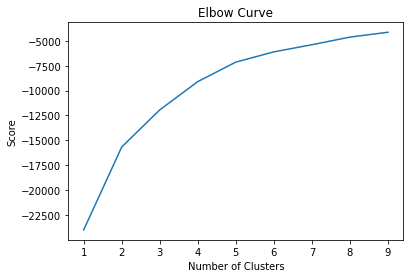

In [43]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The optimal count of your clusters is 5. There is a noticable staright line adjustment after 5.

## 4. k-means clustering

In [44]:
# Create the k-means object

kmeans = KMeans(n_clusters = 5) 

In [45]:
# Fit the k-means object to the data

kmeans.fit(df)

KMeans(n_clusters=5)

In [46]:
df['clusters'] = kmeans.fit_predict(df)

In [47]:
df.head()

,Length,Width,7days_views,USD_price,clusters
0,-1.410053,-1.767432,-0.526456,-0.364766,2
1,-1.502894,-1.804778,-0.625699,-0.364911,2
2,-1.337844,-1.534021,0.430944,-0.364645,2
3,-1.265634,-1.300610,-0.561483,-0.364750,2
4,-1.327528,-1.627386,-0.304620,-0.362863,2


In [48]:
df['clusters'].value_counts()

2    2915
0    2237
3     497
1     322
4      30
Name: clusters, dtype: int64

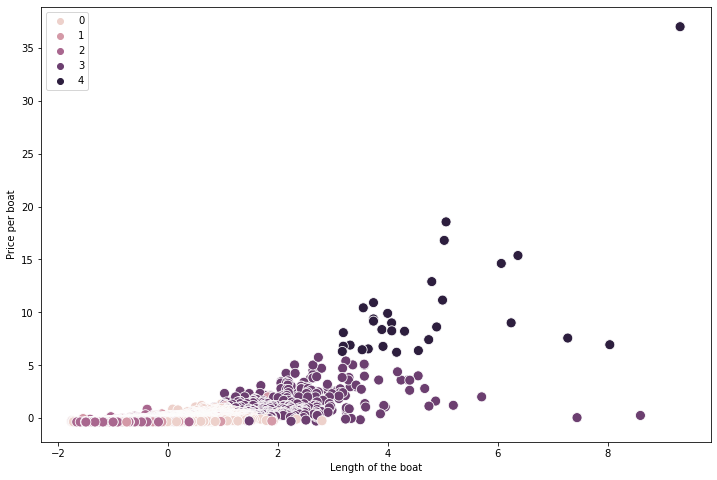

In [49]:
# Plot the clusters for the "USD_price" and "Length" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Length'], y=df['USD_price'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Length of the boat') # Label x-axis.
plt.ylabel('Price per boat') # Label y-axis.
plt.show()

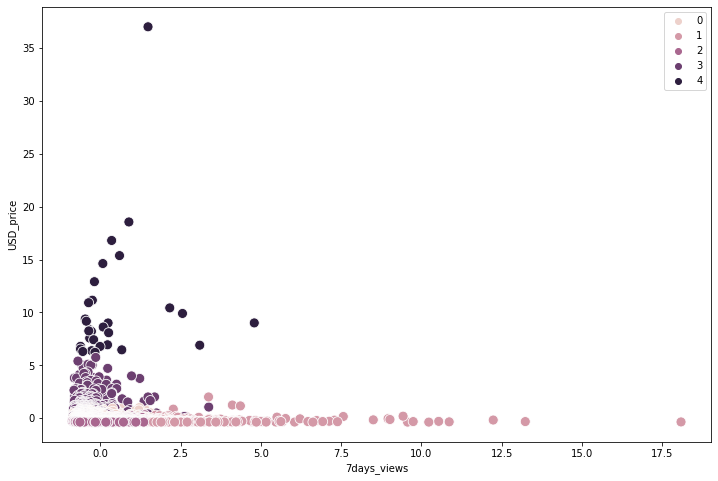

In [50]:
# Plot the clusters for the "7days_views" and "USD_price" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['7days_views'], y=df['USD_price'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('7days_views') 
plt.ylabel('USD_price') 
plt.show()

There can be a realtionship between the length of the boat and the price of the boat as the first graph suggests. The longer the boat the higher the price, but there can be other factors at play as well. The Second graph shows does not really show great inisght on price and views meaning other factors can be a contributor. 

In [51]:
df.loc[df['clusters'] == 4, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 3, 'cluster'] = 'dent purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'whitish purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'whitish pink'

In [53]:
df.groupby('cluster').agg({'Length':['mean', 'median'], 
                         'Width':['mean', 'median'], 
                         '7days_views':['mean', 'median'],
                          'USD_price':['mean', 'median']})

Length               Width           7days_views            \
                    mean    median      mean    median        mean    median   
cluster                                                                        
dark purple     4.686912  4.116043  3.758810  3.451641    0.398253 -0.091540   
dent purple     2.102940  1.921903  1.914885  1.715062   -0.350723 -0.473916   
purple         -0.683587 -0.692084 -0.742114 -0.787105   -0.051831 -0.170350   
whitish pink    0.436719  0.395186  0.569730  0.566679   -0.299304 -0.398025   
whitish purple -0.528116 -0.646695 -0.545605 -0.749760    3.052774  2.418719   

                USD_price            
                     mean    median  
cluster                              
dark purple     10.340007  8.500319  
dent purple      1.222310  0.900364  
purple          -0.270767 -0.293980  
whitish pink    -0.022662 -0.078654  
whitish purple  -0.241330 -0.311076

This analysis has given more insight on what needs to be explored. Further categories need to be explored in order to determine the cost of the boat.
The dark purple cluster returned best stats out of the others. The median number of lengths, width and price is highest and significantly larger than the other four. 